<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/LinInterpSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

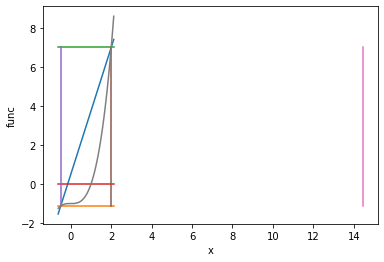

INDEX:  0  X1,X2,Xstar:  -0.5 2 14.435694022076701  f1, f2, f(X*):  -1.125 7 3007.2436222606734
Xstar, f(Xstar):  -0.15384615384615385 -1.003641329085116
INDEX:  1  X1,X2,Xstar:  -0.5 -0.15384615384615385 -0.15384615384615385  f1, f2, f(X*):  -1.125 -1.003641329085116 -1.003641329085116
Xstar, f(Xstar):  2.7088607594936707 18.877421461588227
INDEX:  2  X1,X2,Xstar:  2.7088607594936707 -0.15384615384615385 2.7088607594936707  f1, f2, f(X*):  18.877421461588227 -1.003641329085116 18.877421461588227
Xstar, f(Xstar):  -0.009330189003802225 -1.0000008122155957
INDEX:  3  X1,X2,Xstar:  -0.009330189003802225 -0.15384615384615385 -0.009330189003802225  f1, f2, f(X*):  -1.0000008122155957 -1.003641329085116 -1.0000008122155957
Xstar, f(Xstar):  39.68725340065314 62509.522985502386
INDEX:  4  X1,X2,Xstar:  39.68725340065314 -0.15384615384615385 39.68725340065314  f1, f2, f(X*):  62509.522985502386 -1.003641329085116 62509.522985502386
Xstar, f(Xstar):  -0.15320648279765692 -1.0035960972457663
IN

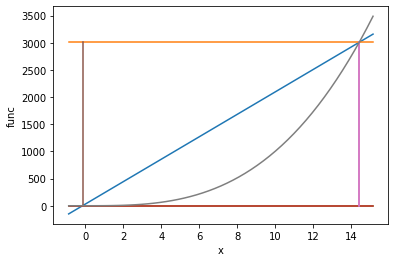

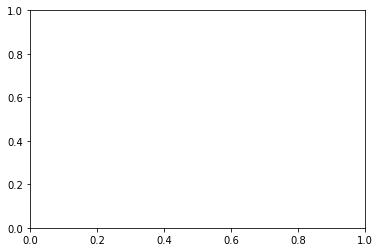

In [60]:
import matplotlib.pyplot as plt
import numpy as np
#For large graphs
#plt.rcParams["figure.figsize"] = (40,40)
#
def func(XA, DEBUG = 0):
  if DEBUG == 1 :
    print("From <func> DEBUG=: ", DEBUG)
    return XA 
  return XA*XA*XA - 0*XA - 1
  return XA*XA - 2*XA + 1
  return np.sin(XA)
def CalcXstar(X1, X2, Fstar, DEBUG = 0):
  xstar = X1 + (Fstar - func(X1,DEBUG)) * (X2 - X1)/(func(X2,DEBUG) - func(X1,DEBUG))
  return xstar
#
def LinInterpS(X1, X2, Ystar, DEBUG = 0):
#
  if DEBUG == 1 :
    print("x: ", x)
  Y1 = func(X1, DEBUG)
  Y2 = func(X2, DEBUG)

  Xstar = CalcXstar(X1, X2, Ystar, DEBUG)
  print("Xstar, f(Xstar): ", Xstar, func(Xstar,DEBUG))
  return Xstar
def LIShow(X1, X2, Xstar, Xscale=1.1,  DEBUG = 0):
  x = 2.0*np.linspace(-0.5, 1.25,num =51)
  Xmarg = 0.5* (X2 - X1)*(Xscale - 1.0)
  x = np.linspace(X1-Xmarg, X2+Xmarg,num =51)
  Y1 = func(X1, DEBUG)
  Y2 = func(X2, DEBUG)
  y = Y1 + (x - X1)*(Y2-Y1)/(X2 - X1)
  if DEBUG == 1 :
    print("x: ",x)
    print("y: ",y)
  plt.plot(x,y, label="y")
#
  plt.plot(x, Y1*np.ones(len(x)), label="Y1")
  plt.plot(x, Y2*np.ones(len(x)), label="Y2")
  plt.plot(x, Ystar*np.ones(len(x)), label="Y*")
#
  plt.plot([X1,X1], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="X1")
  plt.plot([X2,X2], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="X2")
  plt.plot([Xstar,Xstar], [np.min([Y1,Y2]),np.max([Y1,Y2])], label="Xstar")
#
  plt.plot(x, func(x), label="f(x)")
#
  plt.xlabel('x')
  plt.ylabel('func')
  #plt.legend()
  plt.show()
  plt.clf()
  plt.cla()
  return
DEBUG =1
X1 = -0.5; X2 = 2; Ystar = 0
assert ((func(X1)-Ystar)*(func(X2)-Ystar)) < 0.0, "We don't have a bracket!"
LIShow(X1, X2, Xstar, DEBUG = 0)
for INDEX in range(10):
  if DEBUG == 1 : 
    print("INDEX: ",INDEX," X1,X2,Xstar: ", X1,X2,Xstar,
          " f1, f2, f(X*): ", func(X1), func(X2), func(Xstar))
  else : 
    print("Index: ", INDEX)
  Xstar = LinInterpS(X1,X2,Ystar, DEBUG = 0)
  if func(Xstar)*func(X1) < 0 : X1 = Xstar
  else : X2 = Xstar
LIShow(X1, X2, Xstar, DEBUG = 0)

  